In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
from skgaip.fusion.fusion_data import FusionData

# Load and process data

In [67]:
data = FusionData("data/fusion/FRNN_1d_sample/shot_data.npz",
                  "data/fusion/FRNN_1d_sample/test_list.npy",
                  model_path="data/fusion/FRNN_1d_sample/FRNN_1D_sample.h5",
                  normalize=False,
                  headless=False)

Loading data from data/fusion/FRNN_1d_sample/shot_data.npz
Found 3448 shots
Loading keys from data/fusion/FRNN_1d_sample/test_list.npy
Found 862 keys
Filtering data
Filtered to 862 shots
Packing data
Loading model
Transforming data according to <keras.engine.training.Model object at 0x7f1678566f60>
Removing pad


# Collect scores and disruptivity

In [68]:
next(data.featurize())

(array([[-0.58711481],
        [-0.77879554],
        [-0.86142141],
        ...,
        [-0.99354458],
        [-0.99050623],
        [-0.99063104]]),
 array([[0.44614601],
        [0.46733764],
        [0.48895705],
        ...,
        [1.50593638],
        [1.51106846],
        [1.51808262]]),
 147055)

In [69]:
scores = {key: X[-1].item() for X, Y, key in data.featurize()}
scores = np.asarray([scores[key] for key in data.keys]).squeeze()
disruptive = np.asarray([data.disruptive[key] for key in data.keys])

# Compute TPR and FPR

In [71]:
tp = np.sum(np.array([np.logical_and(scores > i, disruptive) for i in np.linspace(-1, 1, 2001)]), axis=1)
fp = np.sum(np.array([np.logical_and(scores > i, ~disruptive) for i in np.linspace(-1, 1, 2001)]), axis=1)
tpr = tp / np.sum(disruptive)
fpr = fp / np.sum(~disruptive)

<IPython.core.display.Javascript object>


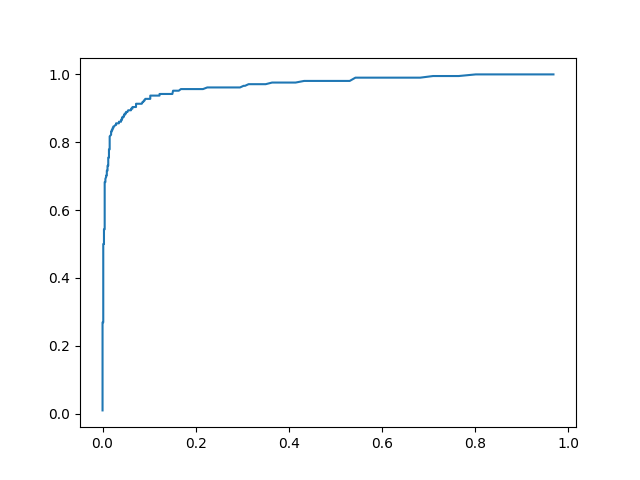

In [72]:
plt.plot(fpr, tpr)

# Compute AUROC

In [73]:
np.dot(fpr[:-1] - fpr[1:], (tpr[:-1] + tpr[:1]) / 2)

0.9522465302281816